In [1]:
import numpy as np
import pandas as pd

In [67]:
import distribution_modules as dm
import density_estimation_modules as dem
import classification_modules as cm
# import distance_modules as d
import importlib

importlib.reload(dm)
importlib.reload(dem)
importlib.reload(cm)
importlib.reload(d)

<module 'distance_modules' from 'C:\\Users\\shfar\\Desktop\\SU\\Thesis\\thesis\\distance_modules.py'>

In [3]:
sample_size, nr_sample = 5, 10
bounded_dists = dm.get_bounded_distribution()
bounded_samples = dm.get_samples(bounded_dists, nr_sample, sample_size)
st_bounded_samples = standardize_df(bounded_samples)

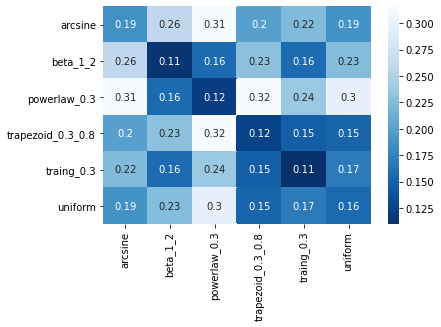

In [31]:
original_d, original_std = d.w_distance(bounded_samples)
d.plot_matrix(original_d, bounded_samples.iloc[:,-1].unique())

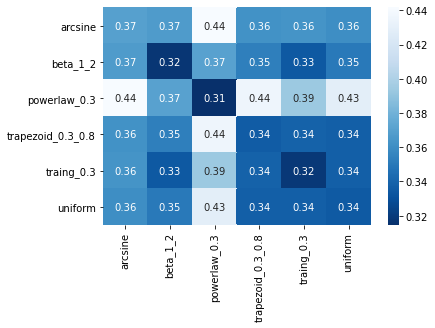

In [30]:
original_d, original_std = d.w_distance(st_bounded_samples)
d.plot_matrix(original_d, st_bounded_samples.iloc[:,-1].unique())

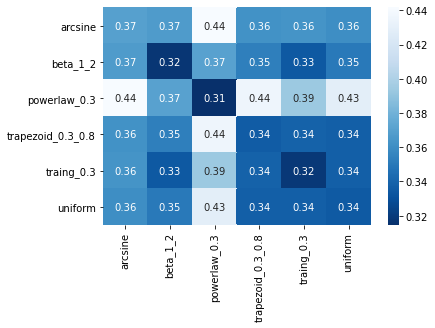

(0.9038873329759936, 4.319183551837938e-14)

In [53]:
nr_moments = 4
moments_df = dem.get_moments(st_bounded_samples, nr_moments)
moments_d, moments_std = d.w_distance(st_bounded_samples)
d.plot_matrix(moments_d, st_bounded_samples.iloc[:,-1].unique())
d.corr_coef(original_d,moments_d)

In [365]:
num_steps = 100
x_b = np.linspace(0,1,num_steps)
kde_df = dem.get_kde(bounded_samples, x_b)
edf_df = dem.get_edf(bounded_samples, x_b)

max_t = 20
t = np.linspace(max_t/num_steps, max_t, num_steps)
ecf_df = dem.get_ecf(bounded_samples, t)

In [187]:
original_d, original_std = d.w_distance(bounded_samples)

kde_d,  = d.w_distance(kde_df)

In [191]:
edf_d = d.w_distance(edf_df)

In [195]:
ecf_d = d.w_distance(ecf_df)

### Moments approach

In [38]:
sample_size_list = [5, 10, 25, 50, 100, 500, 1000]
nr_moments_list = list(range(2,21))

In [41]:
moments_res = d.cv_samplesize_moments(sample_size_list, nr_moments_list, bounded_dists, nr_sample)

Completed:   0%|          | 0/7 [00:00<?, ?it/s]

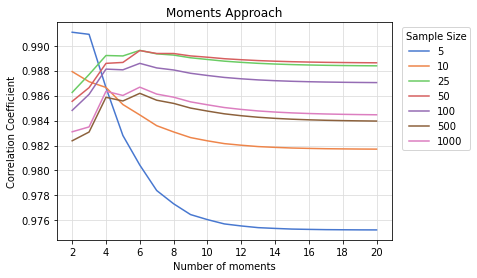

In [42]:
d.plot_cv_moments(moments_res)

In [45]:
moments_st_res = d.cv_samplesize_moments(sample_size_list, nr_moments_list, bounded_dists, nr_sample, standardize = True)

Completed:   0%|          | 0/7 [00:00<?, ?it/s]

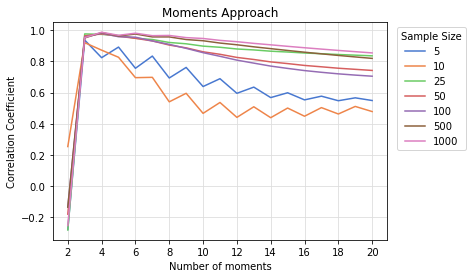

In [47]:
d.plot_cv_moments(moments_st_res)

### KDE

In [54]:
sample_size_list = [5, 10, 50, 100, 500, 1000]
num_steps_list = list(np.arange(1,21))

In [59]:
kde_res = d.cv_numsteps_samplesize(sample_size_list, num_steps_list, bounded_dists, nr_sample, 'kde')

% completed:   0%|          | 0/6 [00:00<?, ?it/s]

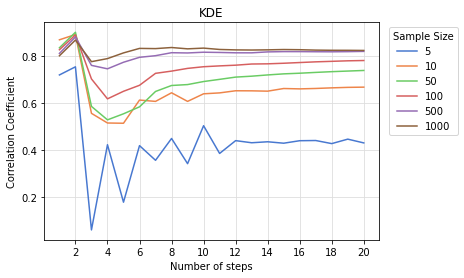

In [62]:
d.plot_cv_numsteps_samplesize(kde_res)

In [63]:
kde_st_res = d.cv_numsteps_samplesize(sample_size_list, num_steps_list, bounded_dists, nr_sample, 'kde', standardize=True)

% completed:   0%|          | 0/6 [00:00<?, ?it/s]

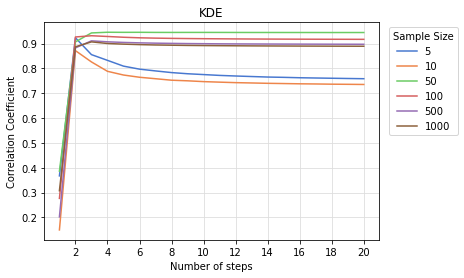

In [64]:
d.plot_cv_numsteps_samplesize(kde_st_res)

### EDF

In [65]:
edf_res = d.cv_numsteps_samplesize(sample_size_list, num_steps_list, bounded_dists, nr_sample, 'edf')

% completed:   0%|          | 0/6 [00:00<?, ?it/s]

C:\Users\shfar\anaconda3\lib\site-packages\scipy\stats\stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


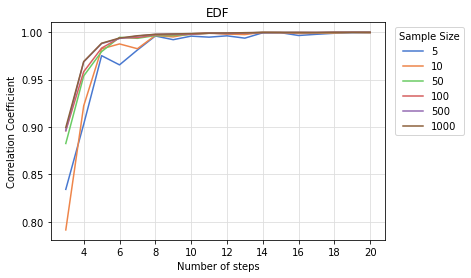

In [70]:
d.plot_cv_numsteps_samplesize(edf_res,'EDF')

In [71]:
edf_st_res = d.cv_numsteps_samplesize(sample_size_list, num_steps_list, bounded_dists, nr_sample, 'edf', standardize=True)

% completed:   0%|          | 0/6 [00:00<?, ?it/s]

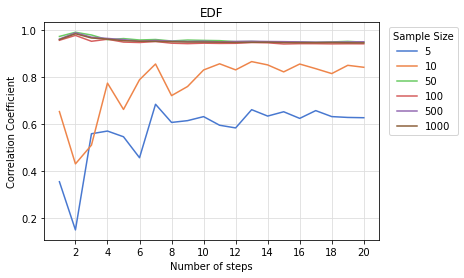

In [72]:
d.plot_cv_numsteps_samplesize(edf_st_res,'EDF')

ValueError: The number of FixedLocator locations (5), usually from a call to set_ticks, does not match the number of ticklabels (4).

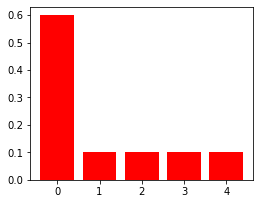

In [318]:
sampP = [1,1,1,1,1,1,2,3,4,5]
sampQ = [1,2,3,4,5,5,5,5,5,5]
# and for scipy.stats.entropy (gives KL divergence here) we want distributions
P = np.unique(sampP, return_counts=True)[1] / len(sampP)
Q = np.unique(sampQ, return_counts=True)[1] / len(sampQ)
# compare to this sample / distribution:
sampQ2 = [1,2,2,2,2,2,2,3,4,5]
Q2 = np.unique(sampQ2, return_counts=True)[1] / len(sampQ2)

fig = plt.figure(figsize=(10,7))
fig.subplots_adjust(wspace=0.5)
plt.subplot(2,2,1)
plt.bar(np.arange(len(P)), P, color='r')
plt.xticks(np.arange(len(P)), np.arange(1,5), fontsize=0)
plt.subplot(2,2,3)
plt.bar(np.arange(len(Q)), Q, color='b')
plt.xticks(np.arange(len(Q)), np.arange(1,5))
plt.title("Wasserstein distance {:.4}\nKL divergence {:.4}".format(
    scipy.stats.wasserstein_distance(sampP, sampQ), scipy.stats.entropy(P, Q)), fontsize=10)
plt.subplot(2,2,2)
plt.bar(np.arange(len(P)), P, color='r')
plt.xticks(np.arange(len(P)), np.arange(1,5), fontsize=0)
plt.subplot(2,2,4)
plt.bar(np.arange(len(Q2)), Q2, color='b')
plt.xticks(np.arange(len(Q2)), np.arange(1,5))
plt.title("Wasserstein distance {:.4}\nKL divergence {:.4}".format(
    scipy.stats.wasserstein_distance(sampP, sampQ2), scipy.stats.entropy(P, Q2)), fontsize=10)
plt.show()